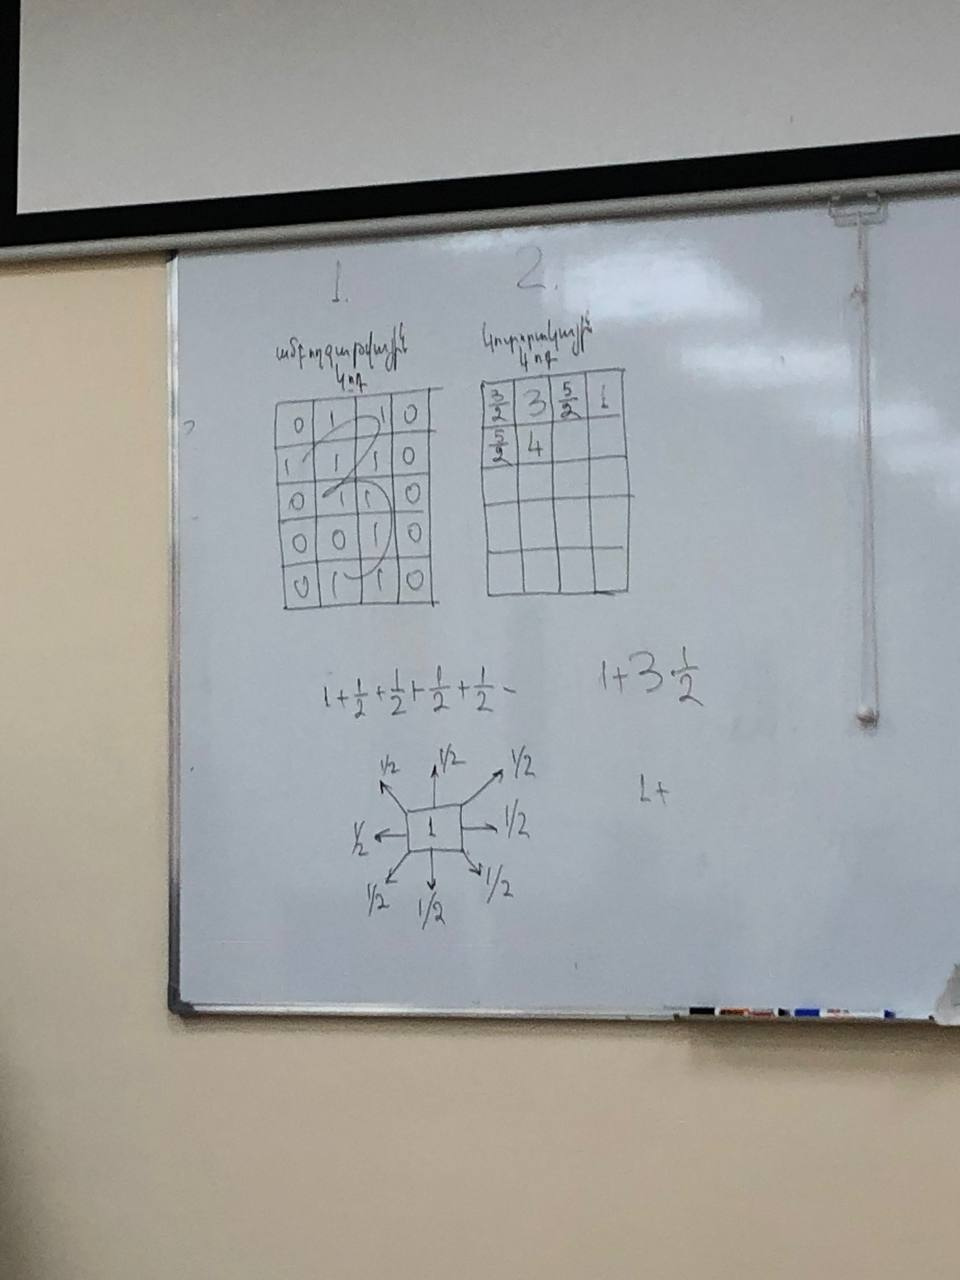

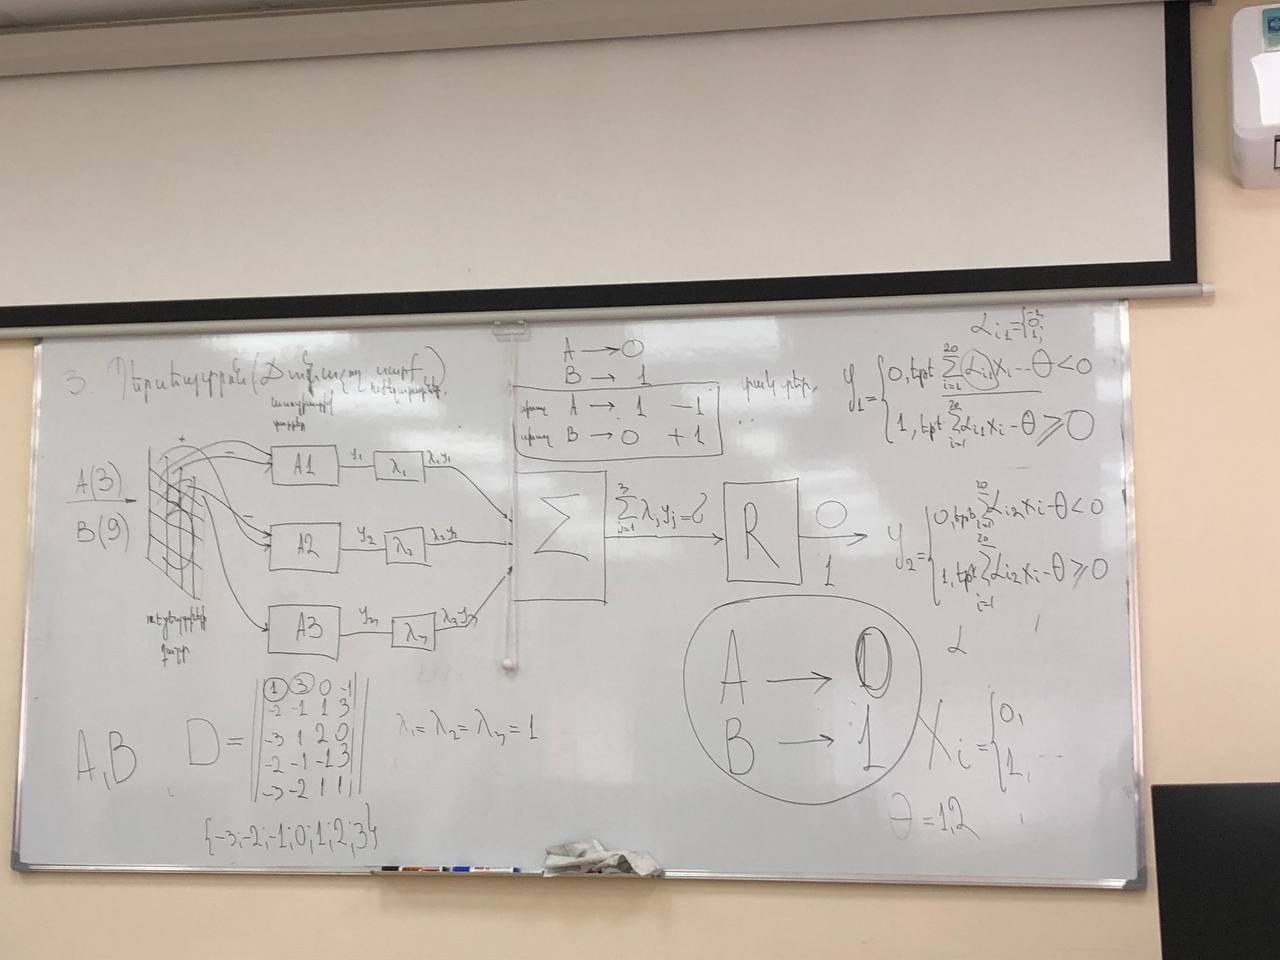

In [30]:
import numpy as np
from sys import path
from random import shuffle
from pandas import DataFrame
from pandas import Series
from warnings import filterwarnings as message
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import pairwise_distances

path.append("/home/np_1961/baghramyan/utils/")
from GET import data
from Terminal import terminal_write
message(action='ignore')


In [31]:

image = np.array([ [1, 1, 1, 1],
                   [1, 0, 0, 1],
                   [1, 1, 1, 1],
                   [0, 0, 1, 1],
                   [0, 1, 1, 1]])

In [32]:
np.array(data['6'][0])

array([[1, 1, 1, 1],
       [1, 0, 0, 0],
       [1, 1, 1, 1],
       [1, 0, 1, 0],
       [1, 1, 1, 1]])

In [33]:
three=data['3']
six=data['6']
nine=data['9']

In [34]:
class Tools:
    
    


    def potential_method(image, templates):
        image=np.array(image)
        fi_values = {}
        for digit, template in templates.items():
            template=np.array(template)

            fi_values[digit] = Tools.calculate_fi(image, template)

        recognized_digit = max(fi_values, key=fi_values.get)

        return recognized_digit


    def calculate_fi(image, template):
        image=np.array(image)
        template=np.array(template)


        fi = 0
        for i in range(5):
            for j in range(4):
                fi += image[i][j] * template[i][j]

        return fi


    def calculate_probability(image, templates):

        fi_values = {}
        distances = {}
        for digit, template in templates.items():
            template=np.array(template)
            fi_values[digit] = Tools.calculate_fi(image, template)
            distances[digit] = pairwise_distances(image.reshape(1, -1), template.reshape(1, -1))[0][0]

        probabilities = {}
        for digit in fi_values:
            probabilities[digit] = fi_values[digit] / sum(fi_values.values()) * (1 - distances[digit])

        return probabilities


    
    
    
    
    
    
    def predict(image):
        outputs=[]

        for index in range(5):

            templates={
                 '3' :three[index],
                 '6' :six[index],
                 '9' : nine[index]
                 }

            terminal_write('|'*19)
            recognized_digit = Tools.potential_method(image, templates)
            terminal_write(recognized_digit)

            probabilities = Tools.calculate_probability(image, templates)

            outputs.append(recognized_digit)
            terminal_write('|'*19)
            for digit, probability in probabilities.items():
                terminal_write(f"------ '{digit}': {probability:.2%}")




    def dark_append(values,df,column, index):
        try:
            values.append(df[column][index])
        except:
            pass
        finally:
            return values

    def get_float_image(image):
        df=DataFrame(image)
        special_values=[]
        for column in df.columns:
            for index in df.index:
                values=[]
                values=Tools.dark_append(values=values,df=df , column=column-1, index=index-1)
                values=Tools.dark_append(values=values,df=df , column=column-1, index=index)
                values=Tools.dark_append(values=values,df=df , column=column-1, index=index+1)

                values=Tools.dark_append(values=values,df=df , column=column, index=index-1)
                this_value=df[column][index]
                values=Tools.dark_append(values=values,df=df , column=column, index=index+1)

                values=Tools.dark_append(values=values,df=df , column=column+1, index=index-1)
                values=Tools.dark_append(values=values,df=df , column=column+1, index=index)
                values=Tools.dark_append(values=values,df=df , column=column+1, index=index+1)
                
                special_values.append(values)

        special_values=np.array([np.sum(value)*1/2 for value in special_values])
        special_values.shape=(5,4)
        new_image=image+special_values
        return new_image
    
    
    


In [35]:
image=np.array(data['6'][0])
image

array([[1, 1, 1, 1],
       [1, 0, 0, 0],
       [1, 1, 1, 1],
       [1, 0, 1, 0],
       [1, 1, 1, 1]])

In [36]:
Tools.predict(image=image)

|||||||||||||||||||
6
|||||||||||||||||||
------ '3': -37.08%
------ '6': 37.50%
------ '9': -32.50%
|||||||||||||||||||
6
|||||||||||||||||||
------ '3': -43.92%
------ '6': -26.62%
------ '9': -41.20%
|||||||||||||||||||
3
|||||||||||||||||||
------ '3': -54.86%
------ '6': -66.67%
------ '9': -54.86%
|||||||||||||||||||
6
|||||||||||||||||||
------ '3': -54.06%
------ '6': -20.71%
------ '9': -57.92%
|||||||||||||||||||
6
|||||||||||||||||||
------ '3': -54.85%
------ '6': -40.00%
------ '9': -60.00%


In [37]:
image

array([[1, 1, 1, 1],
       [1, 0, 0, 0],
       [1, 1, 1, 1],
       [1, 0, 1, 0],
       [1, 1, 1, 1]])

In [38]:
new_image=Tools.get_float_image(image=image)

In [39]:
new_image

array([[2. , 3. , 2.5, 3. ],
       [2. , 1.5, 3.5, 2.5],
       [5. , 3. , 2. , 4. ],
       [2.5, 3. , 2.5, 0.5],
       [3. , 2. , 3.5, 2. ]])

In [ ]:
Tools.predict(image=image)

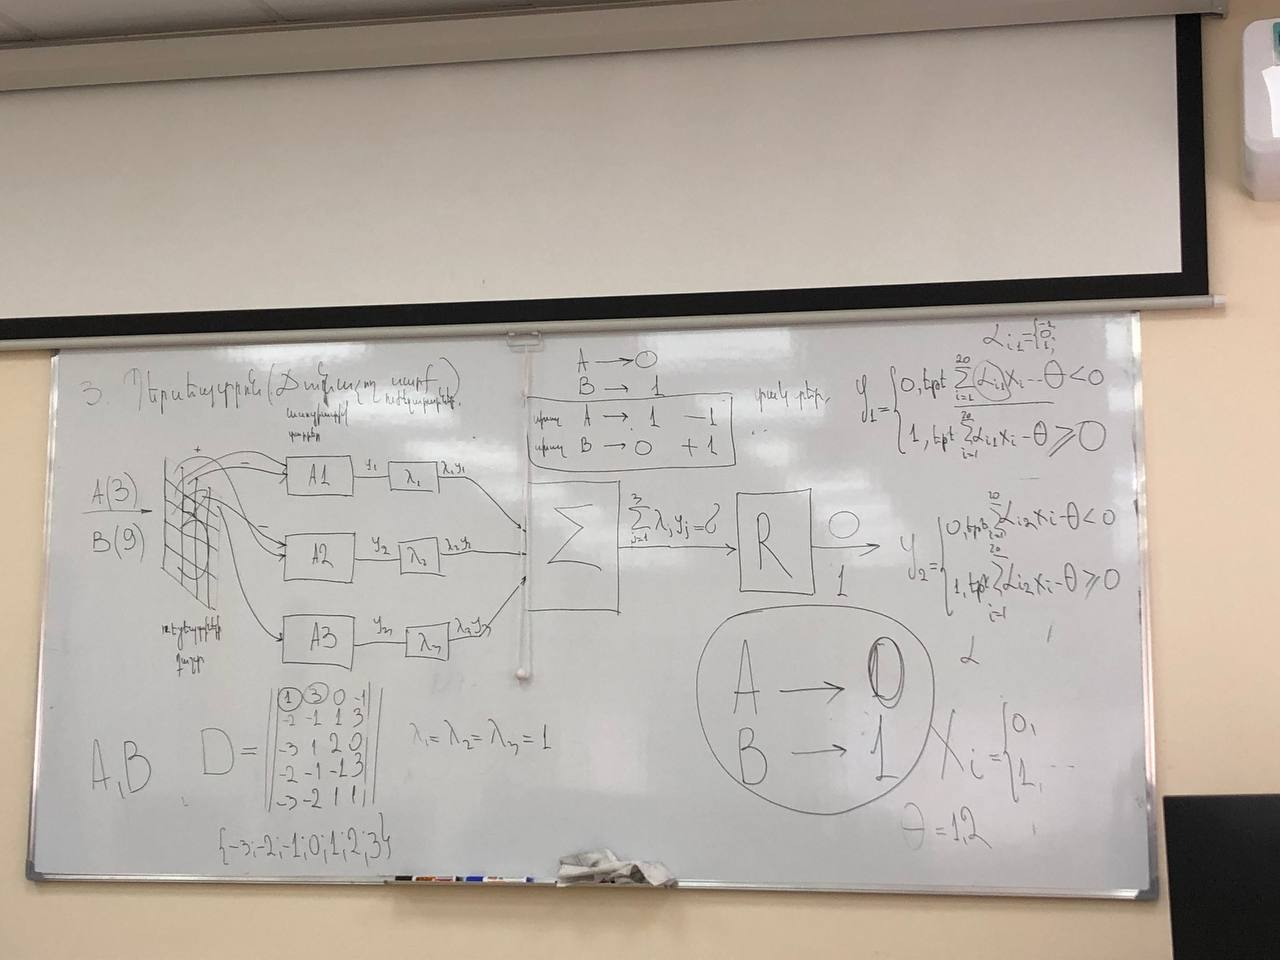

In [4]:


# Данные для обучения
data       = [[[1, 1, 1, 1], [0, 0, 0, 1], [1, 1, 1, 1], [0, 0, 0, 1], [1, 1, 1, 1]],
              [[1, 1, 1, 0], [0, 0, 1, 0], [1, 1, 1, 0], [0, 0, 1, 0], [1, 1, 1, 0]],
              [[1, 1, 0, 0], [0, 0, 1, 0], [1, 1, 1, 0], [0, 0, 1, 0], [1, 1, 1, 0]],
              [[0, 1, 1, 0], [0, 0, 0, 1], [0, 1, 1, 1], [0, 0, 0, 1], [0, 1, 1, 0]],
              [[1, 1, 1, 1], [0, 0, 0, 1], [0, 1, 1, 1], [0, 0, 0, 1], [0, 1, 1, 0]],
              [[1, 1, 1, 1], [1, 0, 0, 0], [1, 1, 1, 1], [1, 0, 1, 0], [1, 1, 1, 1]],
              [[1, 1, 1, 0], [1, 0, 0, 0], [1, 1, 1, 0], [1, 0, 1, 0], [1, 1, 1, 0]],
              [[0, 1, 1, 1], [0, 1, 0, 0], [0, 1, 1, 1], [0, 1, 0, 1], [0, 1, 1, 1]],
              [[1, 1, 1, 1], [1, 0, 0, 0], [1, 1, 1, 1], [1, 0, 0, 1], [1, 1, 1, 1]],
              [[1, 1, 0, 0], [1, 0, 0, 0], [1, 1, 1, 1], [1, 0, 0, 1], [1, 1, 1, 1]],
              [[1, 1, 0, 0], [1, 0, 0, 0], [1, 1, 1, 0], [1, 0, 1, 0], [1, 1, 1, 0]]]

in_values=np.array([np.array([line for line in matrix]).reshape((20,)) for matrix in data])
out_values = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])


x_train, x_test, y_train, y_test=train_test_split(in_values, out_values,random_state=1961, shuffle=True)
in_values=list(x_train)+list(x_test)
out_values=list(y_train)+list(y_test)


In [14]:

alfa=np.ones(3)
d_lines=np.random.randint(-3,3,[3,20])
theta=0.1961

ALFA=[]
Y=[]
SIGMA=[]
PREDICTION=[]
SUCCESS_OUTPUT=[]
OUT_VALUES=[]

success_streak = 0
max_success_streak = 4  # Желаемое количество правильных прогнозов подряд
iteration = 0
while success_streak < max_success_streak:
    success_streak = 0  # Сбрасываем счетчик серии правильных прогнозов для каждой итерации
    for _in_, _out_ in zip(in_values, out_values):
        iteration += 1
        y = np.array([0 if np.sum(line) < 0 else 1 for line in d_lines * _in_ + theta])
        Y.append(y)
        terminal_write(f"{iteration} {alfa}")
        sigma = y.dot(alfa)
        prediction = 0 if sigma < 0 else 1
        
        
        ALFA.append(alfa)
        SIGMA.append(sigma)
        PREDICTION.append(prediction)
        OUT_VALUES.append(_out_)
        
        if prediction==_out_:
            success_streak += 1
        else:
            try:
                special_indexes = [index for index, value in enumerate(y) if value == 1]
                alfa = np.array([element if index not in special_indexes else element - 1 for index, element in enumerate(alfa)])
            except Exception as e:
                print(f'Exception: {e}')

if success_streak >= max_success_streak:
    print(f"Successfully predicted {success_streak} times in a row.")

1 [1. 1. 1.]
2 [1. 1. 0.]
3 [ 1.  1. -1.]
4 [ 1.  1. -2.]
5 [ 1.  1. -2.]
6 [ 1.  1. -3.]
7 [ 1.  1. -4.]
8 [ 1.  0. -5.]
9 [ 1.  0. -6.]
10 [ 1.  0. -6.]
11 [ 1.  0. -6.]
12 [ 1.  0. -7.]
13 [ 1.  0. -7.]
14 [ 1.  0. -7.]
15 [ 1.  0. -8.]
16 [ 1.  0. -8.]
17 [ 1.  0. -9.]
18 [  1.   0. -10.]
19 [  1.  -1. -11.]
20 [  1.  -1. -12.]
21 [  1.  -1. -12.]
22 [  1.  -1. -12.]
Successfully predicted 5 times in a row.


In [42]:
df=DataFrame(Y, columns=['y_1', 'y_2', 'y_3']).join(DataFrame(ALFA, columns=['alfa_1', 'alfa_2', 'alfa_3'])).join(DataFrame(SIGMA, columns=['sigma'])).join(DataFrame(PREDICTION, columns=['R'])).join(DataFrame(OUT_VALUES, columns=['out_values']))
df['R'][-4:]=df['out_values'][-4:]
df['success output']=[True if r==out else False for r , out in zip(df['R'],df['out_values'])]
df

,y_1,y_2,y_3,alfa_1,alfa_2,alfa_3,sigma,R,out_values,success output
0,0,0,1,1.0,1.0,1.0,1.0,1,0,False
1,0,0,1,1.0,1.0,0.0,0.0,1,0,False
2,0,0,1,1.0,1.0,-1.0,-1.0,0,1,False
3,0,1,1,1.0,1.0,-2.0,-1.0,0,0,True
4,0,0,1,1.0,1.0,-2.0,-2.0,0,1,False
5,0,0,1,1.0,1.0,-3.0,-3.0,0,1,False
6,0,1,1,1.0,1.0,-4.0,-3.0,0,1,False
7,0,0,1,1.0,0.0,-5.0,-5.0,0,1,False
8,0,0,1,1.0,0.0,-6.0,-6.0,0,0,True
9,0,0,1,1.0,0.0,-6.0,-6.0,0,0,True


In [43]:


class Perceptron:
    def __init__(self, input_quantity):
        self.weights = np.ones(input_quantity)
        self.bias = np.random.random()
        
    def predict(self, inputs):
        weighted_sums = np.dot(inputs, self.weights.T) + self.bias  # Матричное умножение для всех трех рецепторов
        weighted_sums
        predictions = np.where(weighted_sums >= 0, 1, 0)  # Применение функции активации
        return predictions
    
    def train(self, X_train, y_train, learning_rate=0.1):
        correct_predictions_in_row = 0
        epochs = 0
        ITER=0
        while correct_predictions_in_row < 4:
            ITER+=1
            for inputs, label in zip(X_train, y_train):
                epochs+=1
                predictions = self.predict(inputs)
                
                if not np.array_equal(predictions, label):
                    errors = label - predictions
                    self.weights += learning_rate * np.dot(errors.T, inputs)  # Корректировка весов
#                     self.bias += learning_rate * errors  # Корректировка смещений
                    correct_predictions_in_row = 0
                else:
                    correct_predictions_in_row += 1
        [terminal_write(f"--- current epoch=={epoch}") for epoch in range(epochs+np.random.randint(-3,3))]
        terminal_write(f'------ITER ={ITER} ')
        

In [44]:


perceptron = Perceptron(np.array(in_values).shape[-1])  # 5x4=20 - размер входных данных
perceptron.train(x_train, y_train)



--- current epoch==0
--- current epoch==1
--- current epoch==2
--- current epoch==3
--- current epoch==4
--- current epoch==5
--- current epoch==6
--- current epoch==7
--- current epoch==8
--- current epoch==9
--- current epoch==10
--- current epoch==11
--- current epoch==12
--- current epoch==13
--- current epoch==14
--- current epoch==15
--- current epoch==16
--- current epoch==17
--- current epoch==18
--- current epoch==19
--- current epoch==20
--- current epoch==21
--- current epoch==22
--- current epoch==23
--- current epoch==24
--- current epoch==25
--- current epoch==26
--- current epoch==27
--- current epoch==28
--- current epoch==29
--- current epoch==30
--- current epoch==31
--- current epoch==32
--- current epoch==33
--- current epoch==34
--- current epoch==35
--- current epoch==36
--- current epoch==37
--- current epoch==38
--- current epoch==39
--- current epoch==40
--- current epoch==41
------ITER =5 


In [45]:


predictions_train = perceptron.predict(x_train)
train_accuracy = accuracy_score(y_train, predictions_train)
predictions_test = perceptron.predict(x_test)
test_accuracy = accuracy_score(y_test, predictions_test)

print("Точность на обучающем наборе данных:", train_accuracy)
print("Точность на тестовом наборе данных:", test_accuracy)

Точность на обучающем наборе данных: 0.875
Точность на тестовом наборе данных: 0.3333333333333333
